In [51]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

In [7]:
# load the dataset

data = pd.read_csv('titanic-data.csv')
data

,passenger_id,name,p_class,gender,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [8]:
# no.of columns and rows

data.shape

(891, 12)

In [9]:
# names of the all columns

data.columns

Index(['passenger_id', 'name', 'p_class', 'gender', 'age', 'sib_sp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'survived'],
      dtype='object')

In [10]:
for col in data.columns:
    print(col)

passenger_id
name
p_class
gender
age
sib_sp
parch
ticket
fare
cabin
embarked
survived


In [11]:
# collecting all data types

data.dtypes

passenger_id      int64
name             object
p_class           int64
gender           object
age             float64
sib_sp            int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
survived          int64
dtype: object

In [12]:
# Describe the dataset

data.describe()

,passenger_id,p_class,age,sib_sp,parch,fare,survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [13]:
# information of all dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   name          891 non-null    object 
 2   p_class       891 non-null    int64  
 3   gender        891 non-null    object 
 4   age           714 non-null    float64
 5   sib_sp        891 non-null    int64  
 6   parch         891 non-null    int64  
 7   ticket        891 non-null    object 
 8   fare          891 non-null    float64
 9   cabin         204 non-null    object 
 10  embarked      889 non-null    object 
 11  survived      891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
# drop unnessery columnns
columns_to_drop = ['ticket','cabin']

data = data.drop(columns=columns_to_drop)
data

,passenger_id,name,p_class,gender,age,sib_sp,parch,fare,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,1,22.000000,1,0,7.2500,2,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.000000,1,0,71.2833,0,1
2,3,"Heikkinen, Miss. Laina",3,0,26.000000,0,0,7.9250,2,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.000000,1,0,53.1000,2,1
4,5,"Allen, Mr. William Henry",3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,1,27.000000,0,0,13.0000,2,0
887,888,"Graham, Miss. Margaret Edith",1,0,19.000000,0,0,30.0000,2,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,0,29.699118,1,2,23.4500,2,0
889,890,"Behr, Mr. Karl Howell",1,1,26.000000,0,0,30.0000,0,1


In [58]:
# collecting top 5 rows

data.head()

,passenger_id,name,p_class,gender,age,sib_sp,parch,fare,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,1,22.0,1,0,7.2500,2,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,71.2833,0,1
2,3,"Heikkinen, Miss. Laina",3,0,26.0,0,0,7.9250,2,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,53.1000,2,1
4,5,"Allen, Mr. William Henry",3,1,35.0,0,0,8.0500,2,0


In [59]:
# colecting bottom 5 rows

data.tail()

,passenger_id,name,p_class,gender,age,sib_sp,parch,fare,embarked,survived
886,887,"Montvila, Rev. Juozas",2,1,27.000000,0,0,13.00,2,0
887,888,"Graham, Miss. Margaret Edith",1,0,19.000000,0,0,30.00,2,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,0,29.699118,1,2,23.45,2,0
889,890,"Behr, Mr. Karl Howell",1,1,26.000000,0,0,30.00,0,1
890,891,"Dooley, Mr. Patrick",3,1,32.000000,0,0,7.75,1,0


In [60]:
# checking a Missing values

data.isna()

,passenger_id,name,p_class,gender,age,sib_sp,parch,fare,embarked,survived
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False


In [61]:
data.isna().sum()

passenger_id    0
name            0
p_class         0
gender          0
age             0
sib_sp          0
parch           0
fare            0
embarked        0
survived        0
dtype: int64

In [62]:
# knowing a mean values in age column

age_mean = data['age'].mean()
age_mean

29.69911764705882

In [63]:
# fill in the missing values in  age column 

data['age'].fillna(age_mean, inplace = False)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [64]:
data.isna().sum()

passenger_id    0
name            0
p_class         0
gender          0
age             0
sib_sp          0
parch           0
fare            0
embarked        0
survived        0
dtype: int64

In [65]:
# coverting a categorical into integer values


label_en = LabelEncoder()
data['gender'] = label_en.fit_transform(data['gender'])
data['embarked'] = label_en.fit_transform(data['embarked'])

In [66]:
data['gender'].value_counts()

gender
1    577
0    314
Name: count, dtype: int64

In [67]:
data['embarked'].value_counts()

embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64

In [68]:
data['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

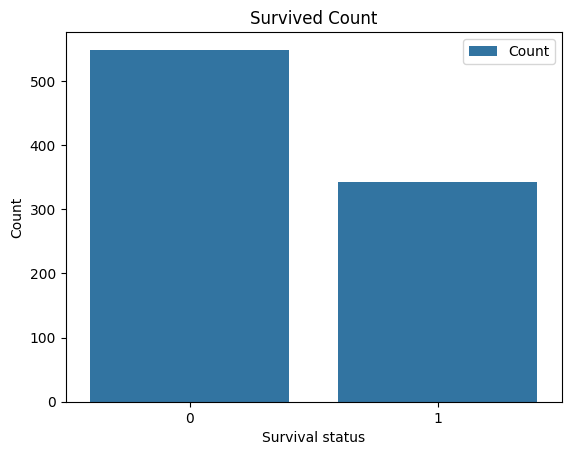

In [35]:
sns.countplot(x='survived', data=data, label="Count")
plt.title("Survived Count")
plt.xlabel("Survival status")
plt.ylabel("Count")
plt.show()


In [70]:
data

,passenger_id,name,p_class,gender,age,sib_sp,parch,fare,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,1,22.000000,1,0,7.2500,2,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.000000,1,0,71.2833,0,1
2,3,"Heikkinen, Miss. Laina",3,0,26.000000,0,0,7.9250,2,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.000000,1,0,53.1000,2,1
4,5,"Allen, Mr. William Henry",3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,1,27.000000,0,0,13.0000,2,0
887,888,"Graham, Miss. Margaret Edith",1,0,19.000000,0,0,30.0000,2,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,0,29.699118,1,2,23.4500,2,0
889,890,"Behr, Mr. Karl Howell",1,1,26.000000,0,0,30.0000,0,1


In [71]:
X = data.iloc[:,[2,4,5,6,7,9]]
y = data.iloc[:,-1]
print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [72]:
X.head()

,p_class,age,sib_sp,parch,fare,survived
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


In [73]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

print("X_train")
print()
print(X_train)
print()

print("X_test")
print()
print(X_test)
print()

print("y_train")
print()
print(y_train)
print()

print("y_test")
print()
print(y_test)


X_train

     p_class        age  sib_sp  parch      fare  survived
29         3  29.699118       0      0    7.8958         0
360        3  40.000000       1      4   27.9000         0
492        1  55.000000       0      0   30.5000         0
869        3   4.000000       1      1   11.1333         1
208        3  16.000000       0      0    7.7500         1
..       ...        ...     ...    ...       ...       ...
501        3  21.000000       0      0    7.7500         0
524        3  29.699118       0      0    7.2292         0
766        1  29.699118       0      0   39.6000         0
698        1  49.000000       1      1  110.8833         0
183        2   1.000000       2      1   39.0000         1

[712 rows x 6 columns]

X_test

     p_class        age  sib_sp  parch     fare  survived
683        3  14.000000       5      2  46.9000         0
797        3  31.000000       0      0   8.6833         1
57         3  28.500000       0      0   7.2292         0
77         3  29.6

In [75]:
def Titanic_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train) 
    ypred = model.predict(X_test) 
    print('Predictions\n', ypred) 
    print('Training Score', model.score(X_train,y_train)) 
    print('Testing Score', model.score(X_test,y_test)) 
    cm = confusion_matrix(y_test,ypred) 
    print('Confusion Matrix\n',cm) 
    print('Classification_Report\n', classification_report (y_test, ypred))

In [76]:
naive_byes_model = GaussianNB()
Titanic_model(naive_byes_model,X_train,X_test,y_train,y_test)

Predictions
 [0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0]
Training Score 1.0
Testing Score 1.0
Confusion Matrix
 [[115   0]
 [  0  64]]
Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

